In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import itertools
import piecewise_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_classif

No handles with labels found to put in legend.


       pct_is_new  pct_is_newish  n_biggest_anc  pct_of_biggest_anc  \
class    0.405524       0.399872       0.320028           -0.149992   

       n_secbiggest_anc  pct_of_secbiggest_anc_new  pct_top_5_anc      wrcr  \
class          0.099988                  -0.004742      -0.117729  0.302838   

       rcr_mid    rcr_hi     human    animal  molecular_cellular  is_clinical  \
class  0.33586  0.421573  0.303893 -0.257706           -0.127085     0.386135   

       is_research_article  cited_by_clin       nih  class  
class            -0.556144       0.419113  0.016337    1.0  
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                float64
pct_of_biggest_anc           float64
n_secbiggest_anc             float64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal

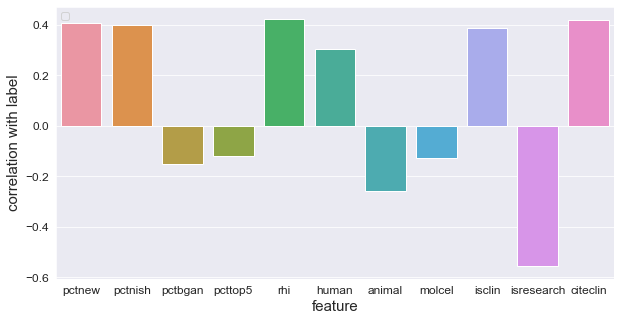

In [5]:
x_train = pd.read_csv("data_84.csv")
x_train = x_train.drop(['cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','pct_of_secbiggest_anc',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','rage','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
a = x_train.corr()
print(a.tail(1))
print(a.dtypes)

x = ['pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih']
y = [0.405524 , 0.399872, -0.149992 ,-0.117729,0.421573,0.303893,-0.257706,-0.127085,0.386135,
    -0.556144, 0.419113,0.016337]
d = pd.DataFrame()
d['label'] = x
d['val'] = y
fig = plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.barplot(data = d, x='label', y='val')
plt.xlabel("feature", fontsize = 15)
plt.ylabel('correlation with label', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend()

length of training file  242
pct_is_new                   float64
pct_is_newish                float64
n_biggest_anc                  int64
pct_of_biggest_anc           float64
n_secbiggest_anc               int64
pct_of_secbiggest_anc_new    float64
pct_top_5_anc                float64
wrcr                         float64
rcr_mid                      float64
rcr_hi                       float64
human                        float64
animal                       float64
molecular_cellular           float64
is_clinical                  float64
is_research_article          float64
cited_by_clin                float64
nih                          float64
dtype: object
top 10
pct_of_biggest_anc           0.000000
n_secbiggest_anc             0.000000
pct_of_secbiggest_anc_new    0.003657
n_biggest_anc                0.027682
molecular_cellular           0.032694
pct_top_5_anc                0.038208
rcr_hi                       0.063565
wrcr                         0.065790
animal           

<Figure size 468x360 with 0 Axes>

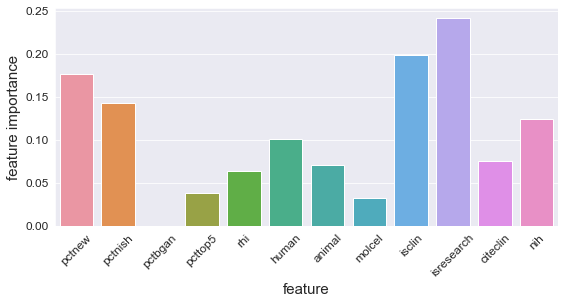

[0.17666107291096478, 0.14270642543553924, 0.0, 0.03820841093749272, 0.06356479124350622, 0.1006702119386258, 0.07058534850629927, 0.032694363641692314, 0.1983639534192998, 0.2413992997807961, 0.07542126472274902, 0.12424360424790803]


In [5]:
def train(x_train):
    
    print("length of training file ",len(x_train))
  
    y_train = x_train['class']
    
    x_train = x_train.drop(['class','cluster','year','n','pct_dusted_ccn','pct_dusted_rmcl','pct_of_secbiggest_anc',
                           'pct_in_secbiggest_anc','rcr_low','secbiggest_anc',
                           'pct_of_biggest_anc_newish','pct_of_biggest_anc_new','rage','n_clusts_90_anc'
                           ,'pct_in_biggest_anc','biggest_anc','pct_of_secbiggest_anc_newish'
                           ], axis = 1)
    
    print(x_train.dtypes)
    
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    fig = plt.figure(figsize=(6.5,5))
    importance = mutual_info_classif(x_train,y_train)
    feat_imp = pd.Series(importance,x_train.columns[0:len(x_train.columns)])
    
    feat_imp = feat_imp.sort_values(ascending=True)
    #feat_imp = feat_imp.tail(10)
    print("top 10")
    print(feat_imp)

    
    x = ['pctnew','pctnish', 'pctbgan','pcttop5',
    'rhi','human','animal','molcel','isclin','isresearch','citeclin','nih']
    y = [feat_imp['pct_is_new'] , feat_imp['pct_is_newish'],feat_imp['pct_of_biggest_anc'],feat_imp['pct_top_5_anc'],
         feat_imp['rcr_hi'],feat_imp['human'],feat_imp['animal'] ,feat_imp['molecular_cellular'],feat_imp['is_clinical'],
         
    feat_imp['is_research_article'],feat_imp['cited_by_clin'],feat_imp['nih']]
    d = pd.DataFrame()
    d['label'] = x
    d['val'] = y
    fig = plt.figure(figsize=(9, 4))
    sns.set_style('darkgrid')
    sns.set_palette('Set2')
    sns.barplot(data = d, x='label', y='val')
    plt.xlabel("feature", fontsize = 15)
    plt.ylabel('feature importance', fontsize = 15)
    plt.xticks(fontsize = 12, rotation = 45)
    plt.yticks(fontsize = 12)
    plt.show()
    print(y)
    
    

x_train = pd.read_csv("data_84.csv")
train(x_train)